<a href="https://colab.research.google.com/github/halfChewedGum/ECON626Competitions/blob/main/ECON_final_02_NN_reg_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis - Neural Networks


In here, I will use Neural Networks to predict the log of car prices. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from google.colab import files
uploaded = files.upload()

Saving 02_wrk_data_train.csv to 02_wrk_data_train.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['02_wrk_data_train.csv']))

In [4]:
# df['log_price'] = pd.Series(np.log(np.array(df['log_price'])))

df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,dollar_price,date_crawled,name,vehicle_type,registration_year,gearbox,power_ps,...,unrepaired_damage,ad_created,postal_code,last_seen_online,price,year,km,damage,age,log_prices
0,0,0,0,900.0,2016-03-26,Renault_Kangoo_1.4__TÃƒÂœV_01/2018__1._Hand,0,2016,0,75,...,ja,2016,82256,2016-04-06,900.0,2016,150000,1.0,0,6.802395
1,1,1,1,7100.0,2016-03-29,BMW_116d_DPF,0,2009,0,116,...,nein,2016,30457,2016-03-30,7100.0,2009,90000,0.0,7,8.867850
2,2,2,2,500.0,2016-03-23,Volkswagen_Lupo_1.4,1,1999,0,75,...,ja,2016,87734,2016-03-23,500.0,1999,150000,1.0,17,6.214608


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'dollar_price',
       'date_crawled', 'name', 'vehicle_type', 'registration_year', 'gearbox',
       'power_ps', 'kilometer', 'registration_month', 'fuel_type',
       'unrepaired_damage', 'ad_created', 'postal_code', 'last_seen_online',
       'price', 'year', 'km', 'damage', 'age', 'log_prices'],
      dtype='object')

In [7]:
#predictors and target train and validation sets 

x = df[['vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'kilometer', 'fuel_type', 'postal_code', 'age']]
y = df['log_prices']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 0)


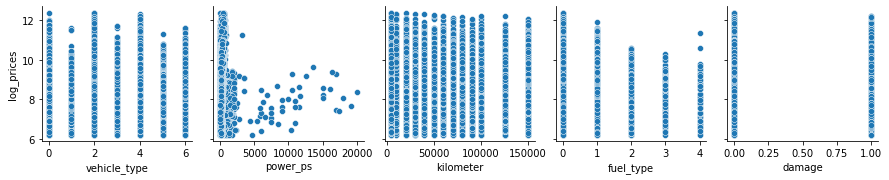

In [9]:
sns.pairplot(df, 
             x_vars = ['vehicle_type', 'power_ps', 'kilometer', 'fuel_type', 'damage'],
             y_vars = ['log_prices']
             )

In [10]:
#normalizer 
from sklearn import preprocessing

def norm_predictors(x):
  """ Takes in a dataframe X and returns a normalized version using MinMaxScaling"""
  cols = list(x.columns)
  x = np.array(x)  
  minMax = preprocessing.MinMaxScaler()
  x_scale = minMax.fit_transform(x)
  df = pd.DataFrame(x_scale, columns = cols)

  return df 

ndf = norm_predictors(df[['vehicle_type', 'gearbox', 'power_ps', 'kilometer', 'fuel_type', 'postal_code', 'age', 'log_prices']])
ndf.head(3)

,vehicle_type,gearbox,power_ps,kilometer,fuel_type,postal_code,age,log_prices
0,0.000000,0.0,0.00375,1.000000,0.00,0.820663,0.000000,0.095271
1,0.000000,0.0,0.00580,0.586207,0.25,0.297076,0.098592,0.430050
2,0.166667,0.0,0.00375,1.000000,0.00,0.876035,0.239437,0.000000


In [11]:
nx = ndf[['vehicle_type', 'gearbox', 'power_ps', 'kilometer', 'fuel_type', 'postal_code', 'age']]
ny = ndf['log_prices']

nx_train, nx_val, ny_train, ny_val = train_test_split(nx, ny, test_size = 0.3, random_state = 0)

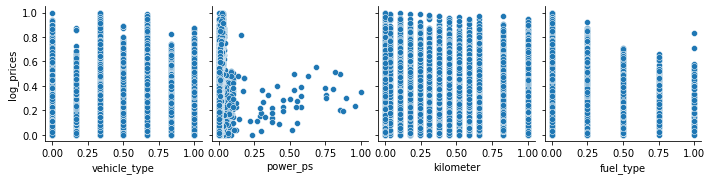

In [13]:
sns.pairplot(ndf, 
             x_vars = ['vehicle_type', 'power_ps', 'kilometer', 'fuel_type'],
             y_vars = ['log_prices']
             )

In [15]:
!pip install scikeras 

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [20]:
#find best model 

def findbestmodel(n_hidden = 2, n_neurons = 30, learning_rate = 0.01, input_shape = [8]):
  model = keras.models.Sequential() 
  model.add(keras.layers.InputLayer(input_shape = input_shape, name = 'input_layer'))

  #hidden layers 
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation = 'relu', name = 'hidden_%s' % i))

  model.add(keras.layers.Dense(1, name = 'output_layer'))

  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  
  model.compile(loss = 'mse', optimizer = optimizer)

  return model 

def findbestmodel7(n_hidden = 2, n_neurons = 30, learning_rate = 0.01, input_shape = [7]):
  model = keras.models.Sequential() 
  model.add(keras.layers.InputLayer(input_shape = input_shape, name = 'input_layer'))

  #hidden layers 
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation = 'relu', name = 'hidden_%s' % i))

  model.add(keras.layers.Dense(1, name = 'output_layer'))

  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  
  model.compile(loss = 'mse', optimizer = optimizer)

  return model 

#Define the hyperparameter space
params = {
          'model__n_hidden': np.arange(1,16),
          'model__n_neurons': np.arange(8,81), 
          'optimizer__learning_rate': [0.01, 0.001, 0.0001]
}

#model I want to use 
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

kerasReg = KerasRegressor(findbestmodel, verbose = 0)
kerasReg_norm = KerasRegressor(findbestmodel7, verbose = 0)

def find_best_params(p, m, x, y, cv):
  rnd_search = RandomizedSearchCV(m, param_distributions= p, n_iter = 10, cv = cv) 
  rnd_search_result = rnd_search.fit(x, y)
  
  best_par = rnd_search_result.best_params_
  best_score = rnd_search_result.best_score_
  best_estimate = rnd_search_result.best_estimator_

  return best_par, best_score, best_estimate

best_pars_dict = {}

best_pars_dict['10cv'] = find_best_params(params, kerasReg, x_train, y_train, 10)
best_pars_dict['5cv'] = find_best_params(params, kerasReg, x_train, y_train, 5)
best_pars_dict['10cv_n'] = find_best_params(params, kerasReg_norm, nx_train, ny_train, 10)
best_pars_dict['5cv_n'] = find_best_params(params, kerasReg_norm, nx_train, ny_train, 5)

# column_names = ['10 CV', '5 CV', '10 CV Normalized', '5 CV Normalized']
best_pars_df = pd.DataFrame.from_dict(best_pars_dict, orient = 'index')

best_pars_df

,0,1,2
10cv,"{'optimizer__learning_rate': 0.001, 'model__n_...",0.178230,KerasRegressor(\n\tmodel=<function findbestmod...
5cv,"{'optimizer__learning_rate': 0.0001, 'model__n...",0.063634,KerasRegressor(\n\tmodel=<function findbestmod...
10cv_n,"{'optimizer__learning_rate': 0.001, 'model__n_...",0.711335,KerasRegressor(\n\tmodel=<function findbestmod...
5cv_n,"{'optimizer__learning_rate': 0.0001, 'model__n...",0.707944,KerasRegressor(\n\tmodel=<function findbestmod...


According to the above results, the best parameters are: 

- Normalized data
- learning rate 0f 0.001
- Neurons 51
- Hidden Layers 5

With accuracy of 71.13%

In [21]:
l_rate_best = 0.001
n_neurons_best = 51
n_hidden_layers_best = 5

n_neurons_reg = 28
n_hidden_layers_reg = 13


def build_deploy_model(n_neuron, n_layers, input_shape, l_rate, x, y, xval, yval, activ):
  model = keras.models.Sequential()

  model.add(keras.layers.InputLayer(input_shape = input_shape, name = 'input_layer'))

  for i in range(n_layers):
    model.add(keras.layers.Dense(n_neuron, activation = activ, name = 'hidden_%s' % i))

  model.add(keras.layers.Dense(1, name = 'output_layer'))

  optimizer = keras.optimizers.Adam(learning_rate = l_rate)

  model.compile(loss = 'mse', optimizer = optimizer)

  print('model exec time: ')
  %time
  history = model.fit(
      x,
      y,
      epochs=100,
      verbose=0,
      validation_split = 0.2)
  
  evals = model.evaluate(xval, yval)
  y_pred = model.predict(xval)
  mse = mean_squared_error(y_pred, yval)
  r2 = r2_score(y_pred, yval)

  model_info = {
      'model' : model,
      'evaluation' : evals,
      'prediction' : y_pred,
      'MSE' : mse,
      'R-Squared' : r2, 
      'history' : history
  }

  return model_info 

information_dict = {
    # 'relu': {},
    # 'tanh': {},
    # 'selu': {},
    # 'elu' : {}
}

information_dict_normal = {}


information_dict['relu'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [8], l_rate_best, x_train, y_train, x_val, y_val, 'relu')
information_dict['tanh'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [8], l_rate_best,x_train, y_train, x_val, y_val, 'tanh')
information_dict['selu'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [8], l_rate_best, x_train, y_train, x_val, y_val, 'selu')
information_dict['elu'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [8], l_rate_best, x_train, y_train, x_val, y_val, 'elu')

information_dict_normal['relu'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [7], l_rate_best, nx_train, ny_train, nx_val, ny_val, 'relu')
information_dict_normal['tanh'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [7], l_rate_best, nx_train, ny_train, nx_val, ny_val, 'tanh')
information_dict_normal['selu'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [7], l_rate_best, nx_train, ny_train, nx_val, ny_val, 'selu')
information_dict_normal['elu'] = build_deploy_model(n_neurons_best, n_hidden_layers_best, [7], l_rate_best, nx_train, ny_train, nx_val, ny_val, 'elu')

model exec time: 
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1422
model exec time: 
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1463
model exec time: 
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1466
model exec time: 
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
1875/1875 [==============================] - 3s 1ms/step - loss: 1060.7668
model exec time: 
CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 6.91 µs
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0064
model exec time: 
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0066
model exec time: 
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wa

In [22]:
information_dict

{'elu': {'MSE': 1060.766052274759,
  'R-Squared': -0.0012656804973132374,
  'evaluation': 1060.766845703125,
  'history': <keras.callbacks.History at 0x7ff80a96c9d0>,
  'model': <keras.engine.sequential.Sequential at 0x7ff80fd28710>,
  'prediction': array([[8.260173],
         [8.260173],
         [8.260173],
         ...,
         [8.260173],
         [8.260173],
         [8.260173]], dtype=float32)},
 'relu': {'MSE': 1.142200947759892,
  'R-Squared': -313965805828.6922,
  'evaluation': 1.142199993133545,
  'history': <keras.callbacks.History at 0x7ff8010cf450>,
  'model': <keras.engine.sequential.Sequential at 0x7ff80a2abdd0>,
  'prediction': array([[8.198138],
         [8.198138],
         [8.198138],
         ...,
         [8.198138],
         [8.198138],
         [8.198138]], dtype=float32)},
 'selu': {'MSE': 1.1465643255489304,
  'R-Squared': -1260660807933.196,
  'evaluation': 1.1465647220611572,
  'history': <keras.callbacks.History at 0x7ff80179c650>,
  'model': <keras.engine.

In [23]:
information_dict_normal

{'elu': {'MSE': 0.006481090640529779,
  'R-Squared': 0.732309659618132,
  'evaluation': 0.0064810835756361485,
  'history': <keras.callbacks.History at 0x7ff80ac033d0>,
  'model': <keras.engine.sequential.Sequential at 0x7ff80b05b950>,
  'prediction': array([[0.17564394],
         [0.17856824],
         [0.5642779 ],
         ...,
         [0.17781794],
         [0.23392889],
         [0.50957876]], dtype=float32)},
 'relu': {'MSE': 0.006417788425440095,
  'R-Squared': 0.7400911305988209,
  'evaluation': 0.006417788099497557,
  'history': <keras.callbacks.History at 0x7ff80a673990>,
  'model': <keras.engine.sequential.Sequential at 0x7ff80b008290>,
  'prediction': array([[0.17559505],
         [0.16747686],
         [0.57056904],
         ...,
         [0.19631448],
         [0.2280469 ],
         [0.49889854]], dtype=float32)},
 'selu': {'MSE': 0.006773888747003552,
  'R-Squared': 0.6538018236968226,
  'evaluation': 0.006773889996111393,
  'history': <keras.callbacks.History at 0x7ff8

'relu': 
{'MSE': 0.006417788425440095,

  'R-Squared': 0.7400911305988209,
 
  'evaluation': 0.006417788099497557,
 
  'history': <keras.callbacks.History at 0x7ff80a673990>,
 
  'model': <keras.engine.sequential.Sequential at 0x7ff80b008290>,
 
  'prediction': array([[0.17559505],

**THE CHOSEN ACTIVATION IS:** 

In [24]:
print('Model Summary : ')
print('-----------------------------------------------------------')

chosen_model = information_dict_normal['relu']
chosen_model['model'].summary()

Model Summary : 
-----------------------------------------------------------
Model: "sequential_734"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_0 (Dense)            (None, 51)                408       
                                                                 
 hidden_1 (Dense)            (None, 51)                2652      
                                                                 
 hidden_2 (Dense)            (None, 51)                2652      
                                                                 
 hidden_3 (Dense)            (None, 51)                2652      
                                                                 
 hidden_4 (Dense)            (None, 51)                2652      
                                                                 
 output_layer (Dense)        (None, 1)                 52        
                                         

In [25]:
print('Model run History (end) : ')
print('-----------------------------------------------------------')

hist = pd.DataFrame(chosen_model['history'].history)
hist['epoch'] = chosen_model['history'].epoch
hist.tail()

Model run History (end) : 
-----------------------------------------------------------


,loss,val_loss,epoch
95,0.006128,0.006389,95
96,0.006125,0.006303,96
97,0.006121,0.006416,97
98,0.006112,0.006394,98
99,0.006098,0.006354,99


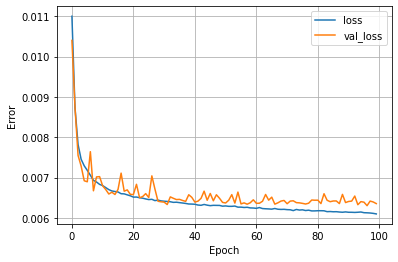

In [26]:
def plot_loss(history):
  plt.plot(chosen_model['history'].history['loss'], label='loss')
  plt.plot(chosen_model['history'].history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(chosen_model['history'])

In [27]:
print('result of the model: ')
chosen_model

result of the model: 


{'MSE': 0.006417788425440095,
 'R-Squared': 0.7400911305988209,
 'evaluation': 0.006417788099497557,
 'history': <keras.callbacks.History at 0x7ff80a673990>,
 'model': <keras.engine.sequential.Sequential at 0x7ff80b008290>,
 'prediction': array([[0.17559505],
        [0.16747686],
        [0.57056904],
        ...,
        [0.19631448],
        [0.2280469 ],
        [0.49889854]], dtype=float32)}

In [28]:
!pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


  0%|          | 0/200 [00:00<?, ?it/s]

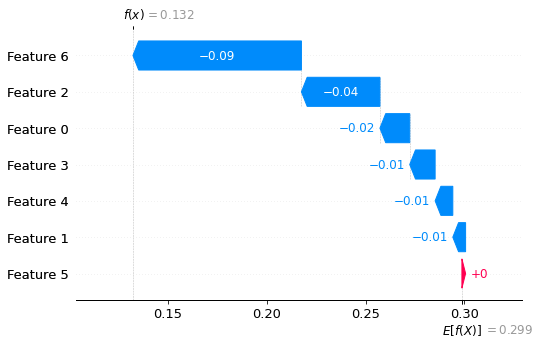

In [29]:
#feature importances in NN:

import shap

kerasReg_norm.fit(nx_train, ny_train)

def f_wrapper(X):

    return kerasReg_norm.predict(X).flatten()

nx_train_df = pd.DataFrame(nx_train)
nX_train_summary = shap.kmeans(nx_train, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,nX_train_summary)

nX_train_sample = nx_train_df.sample(200)
shap_values  = explainer.shap_values(nX_train_sample)


shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0])



In [30]:
!pip install visualkeras

     |████████████████████████████████| 992 kB 5.1 MB/s 


In [32]:
!pip install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=8208e5e13dff327fdc11f8e762bf9a8d04214f2c1b05e7b93d864337ef2f8d2b
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [33]:
import visualkeras
# visualkeras.layered_view(model)


from ann_visualizer.visualize import ann_viz

ann_viz(chosen_model['model'], title="Neural Network - Regression")

In [35]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 10)
# reg_dt = dt.fit(x_train, y_train)
norm_dt = dt.fit(nx_train, ny_train)

# dt_preds = reg_dt.predict(x_val)
ndt_preds = norm_dt.predict(nx_val)

# dt_mse = mean_squared_error(dt_preds, y_val)
# dt_r2 = r2_score(dt_preds, y_val)

ndt_mse = mean_squared_error(ndt_preds, ny_val)
ndt_r2 = r2_score(ndt_preds, ny_val)

# print('Decision Tree MSE (regular): ', dt_mse)
# print('Decision Tree R2 (regular): ', dt_r2)

print('Decision Tree MSE (norm): ', ndt_mse)
print('Decision Tree R2 (norm): ', ndt_r2)


Decision Tree MSE (norm):  0.006753819595636442
Decision Tree R2 (norm):  0.7145614003563272


In [36]:

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 10, random_state = 0)

# reg_rf = rfr.fit(x_train, y_train)
nrf = rfr.fit(nx_train, ny_train)

# rfr_pred = rfr.predict(x_val)
nrfr_pred = nrf.predict(nx_val)

# rfr_mse = mean_squared_error(rfr_pred, y_val)
# rfr_r2 = r2_score(rfr_pred, y_val)

# print('Random Forest MSE: ', rfr_mse)
# print('Random Forest R2: ', rfr_r2)


nrfr_mse = mean_squared_error(nrfr_pred, ny_val)
nrfr_r2 = r2_score(nrfr_pred, ny_val)

print('Random Forest MSE Norm: ', nrfr_mse)
print('Random Forest R2 Norm: ', nrfr_r2)


Random Forest MSE Norm:  0.0062466711332036864
Random Forest R2 Norm:  0.7299188682201457


In [38]:
other_reg_res = {
    'DecisionTreeRegNorm-MSE': 0.0068,
    'DecisionTreeRegNorm-R2': 0.71,
    'RandomForestRegNorm-MSE': 0.0062,
    'RandomForestRegNorm-R2': 0.73,
    'NN-ReLu-51-5Norm-MSE': 0.0064,
    'NN-ReLu-51-5Norm-R2' : 0.74
}

results_reg_algs = pd.DataFrame.from_dict(other_reg_res, orient = 'index', columns = ['results'])
results_reg_algs

,results
DecisionTreeRegNorm-MSE,0.0068
DecisionTreeRegNorm-R2,0.7100
RandomForestRegNorm-MSE,0.0062
RandomForestRegNorm-R2,0.7300
NN-ReLu-51-5Norm-MSE,0.0064
NN-ReLu-51-5Norm-R2,0.7400


According to this, 

- Best MSE value is for Random Forest. 
- Best R2 values is for Neural Network. 

Overall, Random Forest Regressor seems to be the best algorithm. 

In [39]:

#feature importance based on RF

list_cols = ['vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'kilometer', 'fuel_type', 'postal_code', 'age']
list_cols_norm = ['vehicle_type', 'gearbox', 'power_ps', 'kilometer', 'fuel_type', 'postal_code', 'age']

importances = list(rfr.feature_importances_)

# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list_cols, importances)]
feature_importances_norm = [(feature, round(importance, 2)) for feature, importance in zip(list_cols_norm, importances)]

# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances_norm = sorted(feature_importances_norm, key = lambda x: x[1], reverse = True)

# print('feature importances (regular): ')
# for i in range(len(feature_importances)):
#   print(feature_importances[i])

print('feature importances (normalized): ')
for i in range(len(feature_importances_norm)):
  print(feature_importances_norm[i])



feature importances (normalized): 
('age', 0.59)
('power_ps', 0.29)
('kilometer', 0.07)
('vehicle_type', 0.03)
('fuel_type', 0.01)
('postal_code', 0.01)
('gearbox', 0.0)


In [ ]:
# plt.bar(list(range(len(importances))), importances)
# plt.xticks(list(range(len(importances))), feature_importances, rotation = 'vertical')
# plt.xlabel('Features')
# plt.ylabel('impoortance')
# plt.title('Feature Importances RF')
# plt.show()

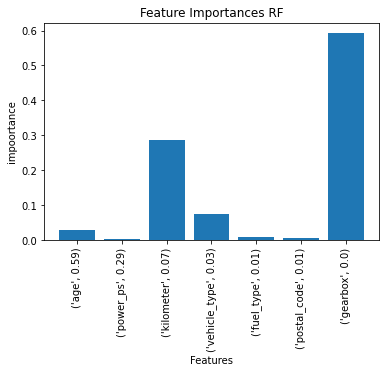

In [40]:
plt.bar(list(range(len(importances))), importances)
plt.xticks(list(range(len(importances))), feature_importances_norm, rotation = 'vertical')
plt.xlabel('Features')
plt.ylabel('impoortance')
plt.title('Feature Importances RF')
plt.show()